# Archival images 🌌
    only in prose >= 2.0.3
    
Sometimes, wether to plan an observation or for comparison, it is useful to visialize some archival images of a field. For that purpose, prose features the `archive` module presented in this tutorial

In [1]:
from prose import archive
import matplotlib.pyplot as plt

## Retrieving a Pan-STARRS1 image

We start by defining the coordinates of our field and its field of view

In [2]:
coord = "04 27 01.36232", "-28 12 48.21681"
fov = [3, 1.5] # in arcmin if not a Quantity

We can then retrieve the `Image`

INFO Querying https://ps1images.stsci.edu/cgi-bin/ps1filenames.py


<WCSAxesSubplot:>

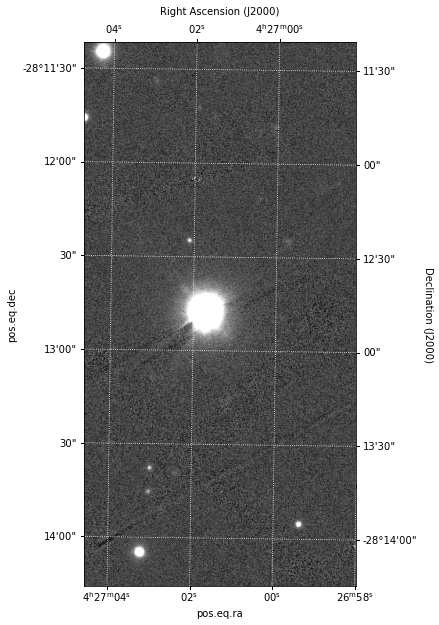

In [3]:
image = archive.pos1_image(coord, fov)
image.show(frame=True)

<div class="alert alert-info">

Note

Check the documentation of the function to see all availbale filters

</div>

## Retrieving an SDSS image

Doing the same for an sdss image with:

INFO Querying https://archive.stsci.edu/cgi-bin/dss_form


Text(0.5, 1.0, '1957-12-21 (poss1_blue)')

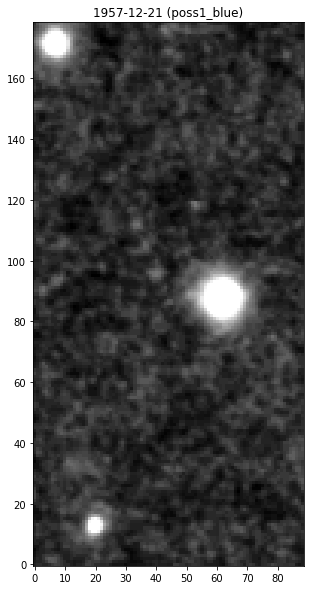

In [4]:
image = archive.sdss_image(coord, fov)
image.show()
# We add a title with meaningful information here
plt.title(f"{image.date.date()} ({image.filter})")

## Overplotting world coordinates

As we may see from the previous plots, the star has an high proper-motion. Let's download a series of archival image from different dates and vizualize them

In [5]:
images = [
    archive.pos1_image(coord, fov, filter="g"),
    archive.sdss_image(coord, fov, filter="poss1_red"),
    archive.sdss_image(coord, fov, filter="poss2ukstu_red"),
]

# we sort by date
images = sorted(images, key=lambda x: x.date)

INFO Querying https://ps1images.stsci.edu/cgi-bin/ps1filenames.py
INFO Querying https://archive.stsci.edu/cgi-bin/dss_form
INFO Querying https://archive.stsci.edu/cgi-bin/dss_form


Since these archival images are plate-solved, we can now overplot the current coordinates of the star over them

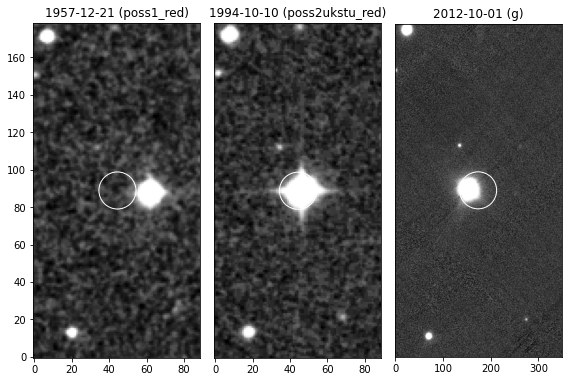

In [6]:
plt.figure(figsize=(8, 8))

for i, im in enumerate(images):
    ax = plt.subplot(1, len(images), i+1)
    im.show(ax=ax)
    ax.set_title(f"{im.date.date()} ({im.filter})")
    if i != 0:
        ax.yaxis.set_visible(False)
        
    # overplotting current star coordinate
    im.plot_marks(coord, color="w", ms=10/im.pixel_scale.value)

plt.tight_layout()

## Gaia stars

As with any `Image` object, it is easy to query gaia stars in the field and overplot them

INFO Querying https://ps1images.stsci.edu/cgi-bin/ps1filenames.py


<AxesSubplot:>

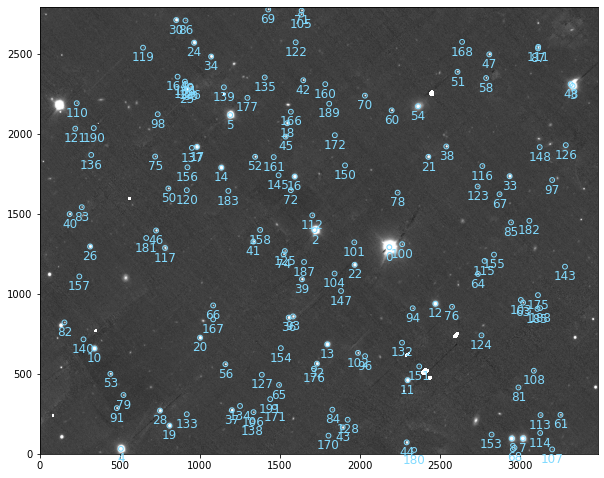

In [7]:
# getting image
image = archive.pos1_image(coord, [12,15], filter="g")

# querying gaia coordinates
image.gaia_stars()
image.show()